# Eigenvalue, Eigenvector
- - -

#### 이론

Covariance matrix $\mathbf{Q}$를 eigen decompostion을 수행하면 다음과 같은 형태로 분리가 됨:
\begin{align}
 \mathbf{Q} = \mathbf{U} \Lambda \mathbf{U}^T
\end{align}
- - -

1) $\mathbf{U}$의 column들이 eigenvector!

2) $\Lambda$의 대각 성분이 eigenvalue!

3) ```numpy``` 에서는 eigh 로 구함

#### numpy의 `linalg.eigh`를 이용한 Eigenvalue와 Eigenvector 구하기

<p><img alt="" src="https://drive.google.com/uc?id=1c-x_UUzVoT7KwcqiS8RKWP9H0kQXY1jq" style="height:400px; width:650px" /></p>


* **return 값 확인할 것 !!!** 

In [225]:
from numpy import linalg as LA
import numpy as np

testCov = [[3, 2, 1], [2, 3, 2], [1, 2, 3]]
eigval, eigvec = LA.eigh(testCov)

In [226]:
print('eigval의 type :', type(eigval))
print('eigval :', eigval)
print('\neigvec의 type :', type(eigvec))
print('eigvec :', eigvec)

eigval의 type : <class 'numpy.ndarray'>
eigval : [0.62771868 2.         6.37228132]

eigvec의 type : <class 'numpy.ndarray'>
eigvec : [[-4.54401349e-01  7.07106781e-01 -5.41774320e-01]
 [ 7.66184591e-01  5.55111512e-17 -6.42620551e-01]
 [-4.54401349e-01 -7.07106781e-01 -5.41774320e-01]]


1) 위 예제에서 ```eigval``` 은 $\Lambda$ 행렬의 대각성분만을 row vector 형태로 돌려줌

2) ```eigh``` 함수의 특징은 ```eigval```을 작은값에서 큰값 순으로 return함

3) **★★우리는 큰 값에서 작은 값으로 정렬(내림차순)하여 사용하기로 하고 수업시간에 배운것 관 같이 eigvec 순서도 정렬해줘야함★★**

예)
$$ \text{eigval} = [\lambda_1, \lambda_2, \lambda_3 ]$$
와
$$ \text{eigvec} = [\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3 ]$$
이 주어졌을때, 만약 $\lambda_3> \lambda_1> \lambda_2$ 순이라면, 
$$ \text{eigval} = [\lambda_3, \lambda_1, \lambda_2 ]$$

$$ \text{eigvec} = [\mathbf{u}_3, \mathbf{u}_1, \mathbf{u}_2 ]$$
로 재정렬

### Excercise 1 - 
#### Eigenvalue, eigenvector 순서 정렬하기 (20 point)

- - -

위 ```testCov```  **행렬의 eigval 과 eigvec**을 위 설명과 같이 `내림차순` 정렬하세요

<br>

**★tip! `numpy_array.argsort()` 필요하면 Google에 검색해 볼 것.!★**

```
# Exercise 1 output

- 정렬된 eigval: [6.37228132 2.         0.62771868]
- 정렬된 eigvec: [[-5.41774320e-01  7.07106781e-01 -4.54401349e-01]
 [-6.42620551e-01  5.55111512e-17  7.66184591e-01]
 [-5.41774320e-01 -7.07106781e-01 -4.54401349e-01]]
```

In [231]:
# 답작성

a=eigval.argsort()[::-1]#eigvla의 argsort를 해주고 역순으로 a에 저장
eigval[a]#위에 했던 인덱싱을 eigval에 그대로 적용
eigvec[:,a]#eigvec에 행은 쭉 가고 열은 a까지 인덱싱을 맞춤
#a=eigval.argsort()[::-1]
print("- 정렬된 eigval:", eigval[a])#출력
print("- 정렬된 eigvec:", eigvec[:,a])#출력

- 정렬된 eigval: [6.37228132 2.         0.62771868]
- 정렬된 eigvec: [[-5.41774320e-01  7.07106781e-01 -4.54401349e-01]
 [-6.42620551e-01  5.55111512e-17  7.66184591e-01]
 [-5.41774320e-01 -7.07106781e-01 -4.54401349e-01]]


In [127]:
x=np.array([5,9,2,4,1])
x[[4,1]]


array([1, 9])


## Computing PCA using RDDs

##  PCA

- - -

이번 실습에서는 PCA를 weather data 중에서 NY state의 SNWD data를 활용하여 수행함


1) Covariance를 구하는 부분은 코드를 아래 이미 작성된 코드를 따라가면 됨

2) 이미 지난 숙제를 통해서 배운 단계이니, 코드를 파악하는 것이 중요함

3) 단, 결과를 어떤 방식으로 저장하는지 파악을 해야 이후 단계에서 불러와서 처리할 수 있기 때문에 코드를 이해해야 합니다


In [222]:
from os import getcwd
getcwd()


'/home/jovyan/work'

In [223]:
from pyspark import SparkContext,SparkConf
from pyspark.sql import *
import numpy as np

sc = SparkContext(master = 'local[*]')
sqlContext = SQLContext(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-6-eead649416d3>:5 

In [130]:
# weather parquet file download 하기
state='NY'
data_dir='Data/Weather'

tarname=state+'.tgz'
parquet=state+'.parquet'

#%mkdir -p $data_dir
#!rm -rf $data_dir/$tarname

#from google_drive_downloader import GoogleDriveDownloader as gdd
#gdd.download_file_from_google_drive(file_id='1hAHV6vC6FvVgrYnoN-lR-IfH488-H121',
#                                   dest_path = 'Data/Weather/NY.tgz')

#!ls -lh $data_dir/$tarname

In [131]:
# 다운받은 파일 압축 풀기
#cur_dir,=!pwd
#%cd $data_dir
#!tar -xzf $tarname
#!du ./$parquet
#%cd $cur_dir

In [132]:
# 압축 푼 파일 확인
parquet_path = data_dir+'/'+parquet
!du -sh $parquet_path

77M	Data/Weather/NY.parquet


In [133]:
# dataframe으로 변환 
df = sqlContext.read.parquet(parquet_path)
print(df.count())
df.show(5)

168398
+-----------+-----------+----+--------------------+-----------------+--------------+------------------+-----------------+-----+-----------------+
|    Station|Measurement|Year|              Values|       dist_coast|      latitude|         longitude|        elevation|state|             name|
+-----------+-----------+----+--------------------+-----------------+--------------+------------------+-----------------+-----+-----------------+
|USW00094704|   PRCP_s20|1945|[00 00 00 00 00 0...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1946|[99 46 52 46 0B 4...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1947|[79 4C 75 4C 8F 4...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1948|[72 48 7A 48 85 4...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517

In [134]:
# table 등록
sqlContext.registerDataFrameAsTable(df,'table')

In [135]:
# 지난 주 숙제에 활용했던 함수 불러오기
import numpy as np
from numpy import linalg as LA

def outerProduct(X):
    """Computer outer product and indicate which locations in matrix are undefined"""
    O = np.outer(X, X)
    N = 1 - np.isnan(O)
    return (O, N)

def sumWithNan(M1, M2):
    """Add two pairs of (matrix,count)"""
    (X1, N1) = M1
    (X2, N2) = M2
    N = N1 + N2
    X = np.nansum(np.dstack((X1,X2)), axis = 2)
    return (X, N)

# calculation function
def calc_func(S, N):
    # E is the sum of the vectors
    E = S[0, 1:]
    # NE is the number of not-nan antries for each coordinate of the vectors
    NE = np.float64(N[0, 1:])
    # Mean is the Mean vector (ignoring nans)
    Mean = E / NE
    # O is the sum of the outer products
    O = S[1:,1:]
    # NO is the number of non-nans in the outer product.
    NO = np.float64(N[1:,1:])
    return  E, NE, Mean, O, NO

In [136]:
# Covaraince 연산하기 
# 마지막에 return 값 확인 필수~!!!!
def computeCov(RDDin):
    """computeCov recieves as input an RDD of np arrays, all of the same length, 
    and computes the covariance matrix for that set of vectors"""
    RDD = RDDin.map(lambda v:np.array(np.insert(v,0,1),dtype=np.float64)) 
    OuterRDD = RDD.map(outerProduct)   
    (S, N) = OuterRDD.reduce(sumWithNan)
    E, NE, Mean, O, NO = calc_func(S, N)

    Cov=O/NO - np.outer(Mean,Mean)
    # Output also the diagnal which is the variance for each day
    Var=np.array([Cov[i,i] for i in range(Cov.shape[0])])
    return {'E':E, 'NE':NE, 'O':O, 'NO':NO, 'Cov':Cov, 'Mean':Mean, 'Var':Var}

In [137]:
# STAT_Description 본 함수 자료를 설명해주는 설명서임 "text"라고 간주하면됨

# description of data returned by computeOverAllDist
STAT_Descriptions = [
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))
]



In [138]:
# 위 함수를 활용한 covariance, mean 등을 연산하여 정리하는  main code

from time import time

sqlContext.registerDataFrameAsTable(df,'weather')

meas= 'SNWD'
STAT = {meas : {}}
Query = "SELECT * FROM weather\n\tWHERE measurement = '%s'"%(meas)
mdf = sqlContext.sql(Query)
print(meas,': shape of mdf is ', mdf.count())

data = mdf.rdd.map(lambda row: np.frombuffer(row['Values'],np.float16))
data.take(3)

# compute covariance matrix
OUT = computeCov(data)

SNWD : shape of mdf is  14617


In [139]:
# OUT가 지난 숙제에서 구한 값들을 weather data 에 적용한 출력 결과임
# 저장 구조 확인 필!
# {'E':E, 'NE':NE, 'O':O, 'NO':NO, 'Cov':Cov, 'Mean':Mean, 'Var':Var}
print(OUT)

{'E': array([1.244081e+06, 1.269656e+06, 1.322181e+06, 1.339225e+06,
       1.331508e+06, 1.336755e+06, 1.406968e+06, 1.466258e+06,
       1.485540e+06, 1.494349e+06, 1.525231e+06, 1.593426e+06,
       1.607456e+06, 1.650410e+06, 1.701856e+06, 1.701141e+06,
       1.718947e+06, 1.707968e+06, 1.675312e+06, 1.698773e+06,
       1.723865e+06, 1.682460e+06, 1.721818e+06, 1.695549e+06,
       1.690204e+06, 1.713633e+06, 1.733878e+06, 1.793680e+06,
       1.817923e+06, 1.848386e+06, 1.945226e+06, 1.965419e+06,
       1.907430e+06, 1.887832e+06, 1.969323e+06, 2.014037e+06,
       2.041231e+06, 2.070580e+06, 2.113331e+06, 2.138941e+06,
       2.081654e+06, 2.011477e+06, 2.006644e+06, 2.012915e+06,
       2.080725e+06, 2.115272e+06, 2.038307e+06, 2.053728e+06,
       2.008996e+06, 2.006009e+06, 1.995406e+06, 1.930971e+06,
       1.892789e+06, 1.846021e+06, 1.824385e+06, 1.828673e+06,
       1.875747e+06, 1.797001e+06, 1.786222e+06, 1.749045e+06,
       1.679247e+06, 1.649193e+06, 1.650987e+06, 

### Excercise 2 - 
#### 위에서 구한 결과에서 Covariance matrix 결과 출력 (5 point)

- - -

``OUT``를 활용하여 Covariance matrix 를 출력하세요.

<br>

```

# Exersize 1 output

 -> Covariance: [[24533.75726199 23941.70598575 23066.17130249 ...  7617.9044827
   7379.92048087  7567.8603963 ]
 [23941.70598575 25449.46142512 24666.0064621  ...  8210.2973947
   7965.20806728  8099.41512562]
 [23066.17130249 24666.0064621  26146.73215052 ...  8308.3103615
   7994.01160222  8034.86789953]
 ...
 [ 7617.9044827   8210.2973947   8308.3103615  ... 24550.3332284
  23487.93871963 22274.63652772]
 [ 7379.92048087  7965.20806728  7994.01160222 ... 23487.93871963
  24583.45550868 23206.83678396]
 [ 7567.8603963   8099.41512562  8034.86789953 ... 22274.63652772
  23206.83678396 24550.66736384]]
```

In [140]:
a={"A":1,"B":2}
print(a.get("A"))

1


In [224]:
### Excercise 2 - 
# 결과 출력
#print(OUT.items())
COV=OUT['Cov']#OUT의 'Cov'를 COV에 저장
print("Covariance:",COV)#출력하면 covariance만 뽑아져 나옴
#print("Covariance:", [BLANK])

Covariance: [[24533.75726199 23941.70598575 23066.17130249 ...  7617.9044827
   7379.92048087  7567.8603963 ]
 [23941.70598575 25449.46142512 24666.0064621  ...  8210.2973947
   7965.20806728  8099.41512562]
 [23066.17130249 24666.0064621  26146.73215052 ...  8308.3103615
   7994.01160222  8034.86789953]
 ...
 [ 7617.9044827   8210.2973947   8308.3103615  ... 24550.3332284
  23487.93871963 22274.63652772]
 [ 7379.92048087  7965.20806728  7994.01160222 ... 23487.93871963
  24583.45550868 23206.83678396]
 [ 7567.8603963   8099.41512562  8034.86789953 ... 22274.63652772
  23206.83678396 24550.66736384]]


### Excercise 3 - (10 point)

##### Eigenvector, Eigenvalue 구하기

- - -

위에서 구한 SWND data에 대한 Covariance 행렬을 활용하여 eigen value decompotion을 수행하세요. 

<br>

**task**

* 1.`eigen value 들은 eigval(변수명)` 로 저장 & `eigen vector 들은 eigvec(변수명)` 로 저장하세요

* 2. 순서를 eigen value 값이 큰값에서 작은 값이 되도록 정렬(내림차순)하고 eigen vector로 같은 원리로 정렬하세요

<br>

* 3. STAT dictionary에 'eigval'과 'eigvec' 항목을 추가하여 저장하는 부분은 주어지니, 형식에 맞춰서 저장하면 됩니다

<br> 

**★위 STAT 값은 아래에서 계속 활용되니 저장되는 형식을 숙지하세요★**


```
# task3-3 output
STAT[meas]['eigval'] [2742008.05793794  446193.78915167  224680.76680016  219381.26116906
  144138.98799991]

STAT[meas]['eigvec'] [[ 0.05931374  0.04804572 -0.11539879 -0.09368921 -0.0639553 ]
 [ 0.06106329  0.05172329 -0.11584723 -0.10096473 -0.07025214]
 [ 0.06355908  0.05964688 -0.12121571 -0.10394116 -0.08376024]
 [ 0.06565279  0.06796906 -0.12550461 -0.11100038 -0.0984372 ]
 [ 0.06690595  0.06990584 -0.130131   -0.10568974 -0.10882927]]

```

**task**

* 1.`eigen value 들은 eigval(변수명)` 로 저장 & `eigen vector 들은 eigvec(변수명)` 로 저장하세요(5 point)

* 2. 순서를 eigen value 값이 큰값에서 작은 값이 되도록 정렬(내림차순)하고 eigen vector로 같은 원리로 정렬하세요(5 point)

In [142]:
# task 3-1 답안 작성
eigval, eigvec = LA.eigh(COV)#eigh함수를 통해 아까 뽑은 covariance만을 eigval,eigvec으로 저장
a=eigval.argsort()[::-1]#argsort를 통해 역순 인덱싱만 a에 저장
eigval=eigval[a]#eigval에 인덱싱 순서a를 저장
eigvec=eigvec[:,a]#eigvec에는 인덱싱 순서 a를 저장
print("eigval:",eigval[0:5])#5개만 뽑아냄
print("eigvec:",eigvec[0:5,0:5])#5x5형태로 뽑아냄


eigval: [2742008.05793794  446193.78915167  224680.76680016  219381.26116906
  144138.98799991]
eigvec: [[ 0.05931374  0.04804572 -0.11539879 -0.09368921 -0.0639553 ]
 [ 0.06106329  0.05172329 -0.11584723 -0.10096473 -0.07025214]
 [ 0.06355908  0.05964688 -0.12121571 -0.10394116 -0.08376024]
 [ 0.06565279  0.06796906 -0.12550461 -0.11100038 -0.0984372 ]
 [ 0.06690595  0.06990584 -0.130131   -0.10568974 -0.10882927]]


**task**

* 3. STAT dictionary에 'eigval'과 'eigvec' 항목을 추가하여 저장하는 부분은 주어지니, 형식에 맞춰서 저장하면 됩니다

```
# task3-3 output
STAT[meas]['eigval'] [2742008.05793794  446193.78915167  224680.76680016  219381.26116906
  144138.98799991]

STAT[meas]['eigvec'] [[ 0.05931374  0.04804572 -0.11539879 -0.09368921 -0.0639553 ]
 [ 0.06106329  0.05172329 -0.11584723 -0.10096473 -0.07025214]
 [ 0.06355908  0.05964688 -0.12121571 -0.10394116 -0.08376024]
 [ 0.06565279  0.06796906 -0.12550461 -0.11100038 -0.0984372 ]
 [ 0.06690595  0.06990584 -0.130131   -0.10568974 -0.10882927]]

```

In [143]:
# collect all of the statistics in STAT[meas]
STAT[meas]['eigval'] = eigval
STAT[meas]['eigvec'] = eigvec
STAT[meas].update(OUT)

print("STAT[meas]['eigval']", STAT[meas]['eigval'][:5])
print("\nSTAT[meas]['eigvec']", STAT[meas]['eigvec'][:5,:5])

STAT[meas]['eigval'] [2742008.05793794  446193.78915167  224680.76680016  219381.26116906
  144138.98799991]

STAT[meas]['eigvec'] [[ 0.05931374  0.04804572 -0.11539879 -0.09368921 -0.0639553 ]
 [ 0.06106329  0.05172329 -0.11584723 -0.10096473 -0.07025214]
 [ 0.06355908  0.05964688 -0.12121571 -0.10394116 -0.08376024]
 [ 0.06565279  0.06796906 -0.12550461 -0.11100038 -0.0984372 ]
 [ 0.06690595  0.06990584 -0.130131   -0.10568974 -0.10882927]]


In [144]:
STAT

{'SNWD': {'eigval': array([ 2.74200806e+06,  4.46193789e+05,  2.24680767e+05,  2.19381261e+05,
          1.44138988e+05,  7.71028450e+04,  5.87889037e+04,  5.72958774e+04,
          5.18850214e+04,  4.57981975e+04,  3.90583722e+04,  3.65329051e+04,
          3.29084518e+04,  2.72103033e+04,  2.34042468e+04,  2.05603093e+04,
          1.88689850e+04,  1.82922371e+04,  1.47634780e+04,  1.34009003e+04,
          1.26687132e+04,  1.14556513e+04,  1.08895219e+04,  8.67112473e+03,
          8.21485931e+03,  7.93133220e+03,  7.78569840e+03,  7.05129725e+03,
          6.74998171e+03,  6.66815252e+03,  6.37580293e+03,  6.01586697e+03,
          5.82394934e+03,  5.52672308e+03,  5.50505198e+03,  5.09020226e+03,
          4.85238742e+03,  4.57751740e+03,  4.47778965e+03,  4.26979110e+03,
          4.07541988e+03,  3.97109074e+03,  3.79961329e+03,  3.70454670e+03,
          3.45391404e+03,  3.37135190e+03,  3.24964178e+03,  3.12482749e+03,
          3.00188549e+03,  2.89264604e+03,  2.76876802e+03

In [145]:
# 새롭게 구한 eigval, eigvec dictionary에 잘 추가되었는지 확인
STAT['SNWD'].keys()

dict_keys(['eigval', 'eigvec', 'E', 'NE', 'O', 'NO', 'Cov', 'Mean', 'Var'])

### Script for plotting yearly plots 

In [146]:
from matplotlib import *
from matplotlib.pylab import subplot,axis
import sys
from pylab import *

### Visualization을 통한 분석

1. mean 및 mean $\pm$ std plot하기

아래 예제를 통해서 plot하는 방법을 숙지하세요.
```plot``` function은 아래와 같이 활용합니다:

```plot(x축값, y축값, color='b')```

여기서 ```color``` 는 graph의 색을 표현함 ```'b'```는 파란색, ```'r'```는 붉은색, ```'black'``` 검정 등

```figsize``` 는 전체 그래프의 크기표시하는것으로 아래 설정해둔 값을 활용하면 됨

```grid()``` 는 graph내에서 눈금자를 보이게하는 명령어임


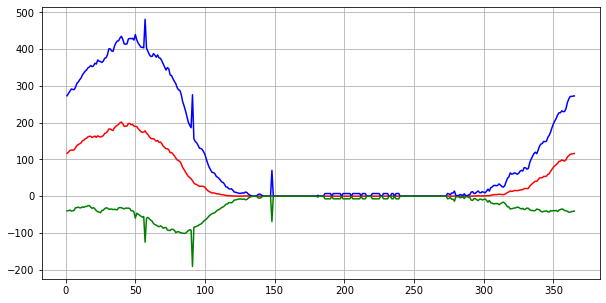

In [147]:
figure(figsize =(10,5)) # plot의 size 조절

yearday = [i for i in range(1,366)] # x축 설정(1일 ~ 365일)

plot(yearday,STAT[meas]['Mean'], color='r')
plot(yearday,STAT[meas]['Mean'] + np.sqrt(STAT[meas]['Var']), color='b')
plot(yearday,STAT[meas]['Mean'] - np.sqrt(STAT[meas]['Var']), color='g')
grid()

### Excercise 4 - (5 point)

날짜별로 기록한 data 수 plot하기 (날짜별 non-nan data 총수)

- - -

**task**

* ```STAT```에서 non-nan data 의 총 수를 저장한 부분(``NE``)을 활용하여 날짜별로 non-nan의 수를 출력하세요 

```
# Exercise 4 output
```
<p><img alt="" src="https://drive.google.com/uc?id=17y7GmCidHSPxk-jqpZ1KcFGBYWp4_oBt" style="height:300px; width:500px" /></p>

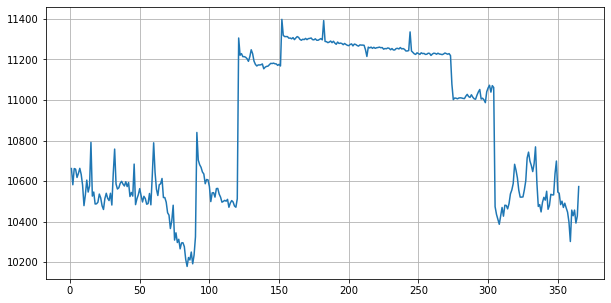

In [148]:
# 답 작성
figure(figsize=(10,5))
yearday=[i for i in range(1,366)]
plot(yearday,STAT['SNWD']['NE'])#x축에는 yearday를 넣고 STAT['SNWD']['NE']를 y축에 넣고 plot하여 보여줌

# 여기에 plot 을 활용하여 작성
grid()

### Excercise 5 - (20 point)

각 eigen vector가 전체 data 에 대해서 얼만큼 "설명" 해주는지 보여주는 그래프를 출력합니다.

- - -

각 eigen vector가 전체 데이터에 얼만큼 설명해주는지의 지표는 다음과 같이 구합니다

$$
i \text{ 번째 성분이 설명해주는 비율} = \frac{\lambda_i}{\sum_{i=1}^d \lambda_i}
$$

**task**

* 1. 다음의 절차에 따라 plot을 출력하세요(5 point)

    1) xaxis =  [0, 1, 2, 3, 4, 5]

    2) yaxis = 
$$ \left[ 0, 
\frac{\lambda_1}{\sum_{i=1}^d \lambda_i}, \frac{\lambda_1+\lambda_2}{\sum_{i=1}^d \lambda_i},\ldots, \frac{\lambda_1+\cdots + \lambda_5}{\sum_{i=1}^d \lambda_i} \right]$$

<br>

```
★yaxis에 대한 hint!!!★
# hint (cumsum 함수를 쓰면 편할수 있습니다)
# cumsum([a, b, c, d ]) output 은 [a, a+b, a+b+c, a+b+c+d]
print(cumsum(np.array([1, 2, 3, 4])))
---> [ 1  3  6 10]
```

<br>


* 2. 출력된 plot이 무엇을 의미하는지 설명을 간단하세 쓰세요(5 point)

- - -
```
# Exercise 5 output
```
<p><img alt="" src="https://drive.google.com/uc?id=1Dm7zTwGxR-GHUTzArSmzYVJNe1BEiK_b" style="height:350px; width:550px" /></p>

In [149]:
STAT['SNWD']['eigval'][0:5]
STAT['SNWD']['eigvec'][:,0:5].shape


(365, 5)

In [150]:
a=cumsum(np.array([0,2,3]))
b=cumsum(np.array([3,4,5]))
print(b/a)
#inf data에서는 nan으로 표시

[inf 3.5 2.4]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


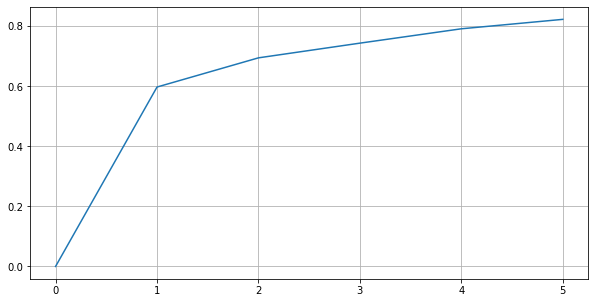

In [151]:
# 작성
figure(figsize=(10,5))
xaxis=np.array([0,1,2,3,4,5])
yaxis=np.insert(cumsum(STAT['SNWD']['eigval'][0:5]),0,0)/sum(STAT['SNWD']['eigval'])
#print(yaxis)
#yaxis=cumsum(xaxis)/cumsum(yaxis)
plot(xaxis, yaxis)

grid()

# 설명 작성 (주석으로 설명)
#xaxis는 위에서 언급한대로 그대로 직접 넣어주고 yaxis는 0번째 자리에 똑같이 0을 넣어서 맞춰주고 eigval만 뽑아서 cumsum을 하여 분자에 놓고 총합eigval을 분모에 두고 나눈다 그 후 x축에 xaixs y축에 yasxis를 넣고 plot함수 사용

### Excercise 6 - (10 point)

Top 3 Eigen vector plot

- - -

**task**

* ```STAT```에서 Eigen vector를 저장한 부분(``eigvec``)을 활용하여 Top 3 Eigen vecotr의 plot 출력하세요 

```
# Exercise 6 output
```
<p><img alt="" src="https://drive.google.com/uc?id=1fd7kCcglsXZIR3RjMsi5njX9IfONewsW" style="height:400px; width:600px" /></p>

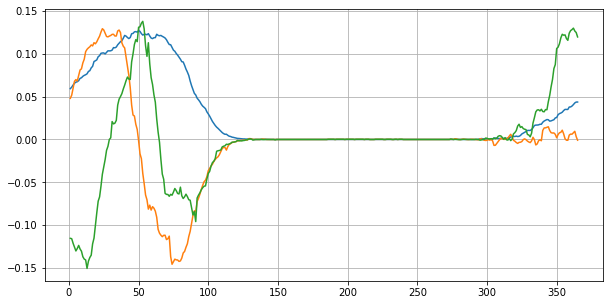

In [166]:
# 답작성
figure(figsize=(10,5))
plot(yearday,STAT['SNWD']['eigvec'][:,:3])#x축에 yearday를 넣고 y축에 STAT['SNWD']['eigvec']의 가장 3번쨰만 (정렬이 되어있으므로)뽑아서 plot 함수 사용
grid()


### Excercise 7 - (30 point)

Top 3 eigenvector로 데이터 복원하기.

- - -

SNWD 의 data vector를 $\mathbf{x}$라고 가정합니다. Eigenvector 3개로 estimate한 vector를 $\mathbf{w}_3$이라고 표기하면:

$$\mathbf{w}_3 = \bar{\mathbf{x}}+ \sum_{i=1}^3 c_i\mathbf{u}_i^T$$

로 표현됩니다. 여기서 $c_i$는

$$c_i =  (\mathbf{x}-\bar{\mathbf{x}})\cdot \mathbf{u}_i$$ 



입니다. $\mathbf{w}_3$와 $\mathbf{x}$ 벡터를 plot 하세요.

* 위 작업에서 활요할 data sample 은 주어집니다 (97번째 SWND 측정 Values np.array 입니다)

```x = np.array(data.collect()[96], dtype=np.float64)```

- - -

**task**

* 1. ``1,2,3 번째 eigenvector`` 와 ($\mathbf{x}-\bar{\mathbf{x}}$)를 내적(`np.dot`)한 $c_1$, $c_2$, $c_3$을 구하세요(5 point)

* 2. eigen vector 1,2,3번에 각각  $c_1$, $c_2$, $c_3$를 곱하고 (10 point)

* 3. 위에서 구한 모든 vector 들과  $\bar{\mathbf{x}}$ vector를 더합니다 (10 point)

* 4. 위에서 구한 $\mathbf{w}_3$와 $\mathbf{x}$를 plot 합니다 (10 point)

<br>

* 5. 96을 다른 값으로 바꿔서 놀아보세요~ 다른 sample에 대한 복원력을 보면, 잘되는 것도 있고 덜 복원되는 sample 도 있습니다 (문제는 아닙니다)

* 6. eigen vector의 수도 바꿔가면서 해볼 수 있습니다 (문제는 아닙니다)

* 7. 전체 365개를 활용하면 어떻게 될까요? (문제는 아닙니다)


```
# Exercise 7 output
```
<p><img alt="" src="https://drive.google.com/uc?id=1v-adyNo0QO5V_MjlvlD21t2CnvMaHFpI" style="height:400px; width:600px" /></p>

In [247]:
x = np.array(data.collect()[96], dtype=np.float64)
sample_mean=np.sum(STAT['SNWD']['eigvec'])/365
eigvec3=STAT['SNWD']['eigvec'][:,3]
Top=np.dot(eigvec3,x-sample_mean)


1117.9081010204293


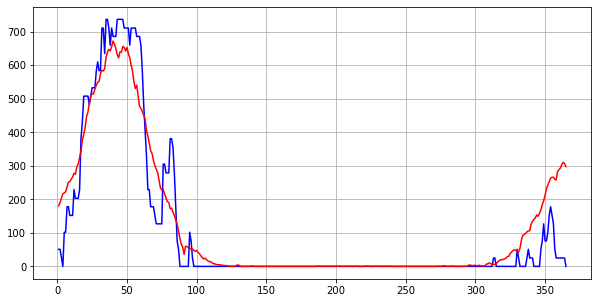

In [248]:
# 아래 작성하세요
x = np.array(data.collect()[96], dtype=np.float64)#주어진 데이터 97번째를 사용
sample_mean=np.sum(STAT['SNWD']['eigvec'].mean())#eigvec를 모두 더하고 그것의 평균을 sample_mean에 저장
means=x-sample_mean#means라는 변수는 x의 데이터 값에서 나온 평균값을 빼줌
c1=np.dot(STAT['SNWD']['eigvec'][:,0],means)#c1은 나온 첫번째 eigvec와 means를 내적
c2=np.dot(STAT['SNWD']['eigvec'][:,1],means)#c2는 나온 두번째 eigvec와 means를 내적
c3=np.dot(STAT['SNWD']['eigvec'][:,2],means)#c3은 나온 세번째 eigvec와 means를 내적
sum1 =STAT['SNWD']['eigvec'][:,0]*c1 #sum1은 나온 eigvec 첫번째 값에 c1을 곱해줌
sum2 =STAT['SNWD']['eigvec'][:,1]*c2#sum2는 나온 eigvec 두번째 값에 c2를 곱해줌
sum3 =STAT['SNWD']['eigvec'][:,2]*c3#sum3은 나온 eigvec 세번쨰 값에 c3을 곱해줌
w3=(sum1 +sum2+ sum3 +sample_mean)#w3은 나온 sum(vector)의 값과 평균을 전부 더해줌
# 답작성
figure(figsize=(10,5))
plot(yearday, x, c='b')#x축에 yearday y축에 x 색은 blue
plot(yearday, w3, c='r')#x축에 yearday y축에 w3 색은 red
grid()